## All libraries we need
##### are here

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder, StandardScaler


In [3]:

# Load the dataset
path_to_data = 'kaggle_london_house_price_data.csv'
df = pd.read_csv(path_to_data)
print(df.columns )  # Inspect column names


Index(['fullAddress', 'postcode', 'country', 'outcode', 'latitude',
       'longitude', 'bathrooms', 'bedrooms', 'floorAreaSqM', 'livingRooms',
       'tenure', 'propertyType', 'currentEnergyRating',
       'rentEstimate_lowerPrice', 'rentEstimate_currentPrice',
       'rentEstimate_upperPrice', 'saleEstimate_lowerPrice',
       'saleEstimate_currentPrice', 'saleEstimate_upperPrice',
       'saleEstimate_confidenceLevel', 'saleEstimate_ingestedAt',
       'saleEstimate_valueChange.numericChange',
       'saleEstimate_valueChange.percentageChange',
       'saleEstimate_valueChange.saleDate', 'history_date', 'history_price',
       'history_percentageChange', 'history_numericChange'],
      dtype='object')


In [4]:
#df.info() 
#df.head()  # Показать первые 5 строк (по умолчанию) или указать количество строк, например: df.head(10)
#df.tail() 
#df.shape # rows, columns
#df.describe()
df['currentEnergyRating'].nunique() 
df.iloc[-5:, :]
#df.iloc[2:5,1:6]


,fullAddress,postcode,country,outcode,latitude,longitude,bathrooms,bedrooms,floorAreaSqM,livingRooms,...,saleEstimate_upperPrice,saleEstimate_confidenceLevel,saleEstimate_ingestedAt,saleEstimate_valueChange.numericChange,saleEstimate_valueChange.percentageChange,saleEstimate_valueChange.saleDate,history_date,history_price,history_percentageChange,history_numericChange
282867,"Apartment 93, Gladstone House, 190 Strand, Lon...",WC2R 1AB,England,WC2R,51.512331,-0.113934,NaN,NaN,180.0,NaN,...,3934000.0,LOW,2024-10-07T13:26:59.894Z,-1447000.0,-30.624339,2017-06-02,2017-06-02,4725000,NaN,NaN
282868,"Apartment 94, Gladstone House, 190 Strand, Lon...",WC2R 1AB,England,WC2R,51.512331,-0.113934,NaN,NaN,152.0,NaN,...,4310000.0,LOW,2024-10-07T13:26:59.894Z,-1327000.0,-26.975543,2017-09-20,2017-09-20,4918900,NaN,NaN
282869,"Apartment 95, Gladstone House, 190 Strand, Lon...",WC2R 1AB,England,WC2R,51.512331,-0.113934,NaN,NaN,200.0,NaN,...,4734000.0,LOW,2024-10-07T13:26:59.894Z,-580000.0,-12.817680,2017-04-12,2017-04-12,4525000,NaN,NaN
282870,"9 Arundel Street, London, WC2R 3DX",WC2R 3DX,England,WC2R,51.511783,-0.113702,NaN,NaN,NaN,NaN,...,2755000.0,MEDIUM,2024-10-07T13:26:59.894Z,-346000.0,-12.142256,2018-01-16,2018-01-16,2851200,NaN,NaN
282871,"11 Arundel Street, London, WC2R 3DX",WC2R 3DX,England,WC2R,51.511783,-0.113702,NaN,NaN,NaN,NaN,...,3139000.0,LOW,2024-10-07T13:26:59.894Z,-479000.0,-15.476575,2018-01-16,2018-01-16,3095000,NaN,NaN


In [5]:
# Number of rows for each number of bedrooms
bedroom_summary = df['bedrooms'].value_counts().sort_index()
print("Number of rows for each number of bedrooms:")
print(bedroom_summary)

# Filter rows where the number of bedrooms is greater than 8
filtered_data = df[df['bedrooms'] > 8][['bedrooms', 'saleEstimate_currentPrice', 'floorAreaSqM']]

# Display the filtered data
print("\nProperties with more than 8 bedrooms:")
print(filtered_data)

# Optional: Save the filtered data to a CSV file
filtered_data.to_csv('filtered_properties.csv', index=False)

Number of rows for each number of bedrooms:
bedrooms
1.0    49657
2.0    96214
3.0    65392
4.0    29441
5.0    11908
6.0     3134
7.0      645
8.0      198
9.0       65
Name: count, dtype: int64

Properties with more than 8 bedrooms:
        bedrooms  saleEstimate_currentPrice  floorAreaSqM
3149         9.0                  1074000.0         239.0
29826        9.0                   853000.0         330.0
29827        9.0                   853000.0         330.0
29828        9.0                   853000.0         330.0
48414        9.0                  5992000.0         400.0
...          ...                        ...           ...
277649       9.0                   368000.0          28.0
277650       9.0                   368000.0          28.0
277651       9.0                   368000.0          28.0
277652       9.0                   368000.0          28.0
277653       9.0                   368000.0          28.0

[65 rows x 3 columns]


In [6]:
# Modify postcode to retain only the first part and one character after the space
df['postcode'] = df['postcode'].str.extract(r'(\S+ \S)')

In [7]:
df['postcode']

0           E1 8
1           E1 8
2           E1 7
3           E1 7
4           E1 7
           ...  
282867    WC2R 1
282868    WC2R 1
282869    WC2R 1
282870    WC2R 3
282871    WC2R 3
Name: postcode, Length: 282872, dtype: object

In [8]:
postcodes = pd.read_csv('postcodes.csv')

# remove %
postcodes['Percent'] = postcodes['Percent'].str.rstrip('%').astype(float)

print(postcodes.head())

  Postcode  Percent
0    BR1 4     58.0
1    BR1 5     49.0
2    BR3 5     61.0
3     E1 0     58.0
4     E1 1     57.0


In [9]:
# Объединение таблиц по посткодам
df = df.merge(postcodes, left_on='postcode', right_on='Postcode', how='left')

# Удаление лишнего столбца Postcode (если нужно)
#data = data.drop(columns=['Postcode'])

# Сохранение результата
#houseprice.to_csv('houseprice_with_percent.csv', index=False)

In [10]:
df.columns

Index(['fullAddress', 'postcode', 'country', 'outcode', 'latitude',
       'longitude', 'bathrooms', 'bedrooms', 'floorAreaSqM', 'livingRooms',
       'tenure', 'propertyType', 'currentEnergyRating',
       'rentEstimate_lowerPrice', 'rentEstimate_currentPrice',
       'rentEstimate_upperPrice', 'saleEstimate_lowerPrice',
       'saleEstimate_currentPrice', 'saleEstimate_upperPrice',
       'saleEstimate_confidenceLevel', 'saleEstimate_ingestedAt',
       'saleEstimate_valueChange.numericChange',
       'saleEstimate_valueChange.percentageChange',
       'saleEstimate_valueChange.saleDate', 'history_date', 'history_price',
       'history_percentageChange', 'history_numericChange', 'Postcode',
       'Percent'],
      dtype='object')

In [11]:
# Drop unnecessary columns
df = df.drop(['fullAddress', 'outcode', 'country', 'saleEstimate_ingestedAt','tenure', 'rentEstimate_lowerPrice',
       'rentEstimate_currentPrice', 'rentEstimate_upperPrice',
       'saleEstimate_lowerPrice', 'currentEnergyRating',
       'saleEstimate_upperPrice', 
       'saleEstimate_valueChange.numericChange',
       'saleEstimate_valueChange.percentageChange',
       'saleEstimate_valueChange.saleDate', 'history_date', 'history_price',
       'history_percentageChange', 'history_numericChange'], axis=1)

In [12]:
df = df.drop(columns=['postcode','Postcode'])


In [13]:
df.columns

Index(['latitude', 'longitude', 'bathrooms', 'bedrooms', 'floorAreaSqM',
       'livingRooms', 'propertyType', 'saleEstimate_currentPrice',
       'saleEstimate_confidenceLevel', 'Percent'],
      dtype='object')

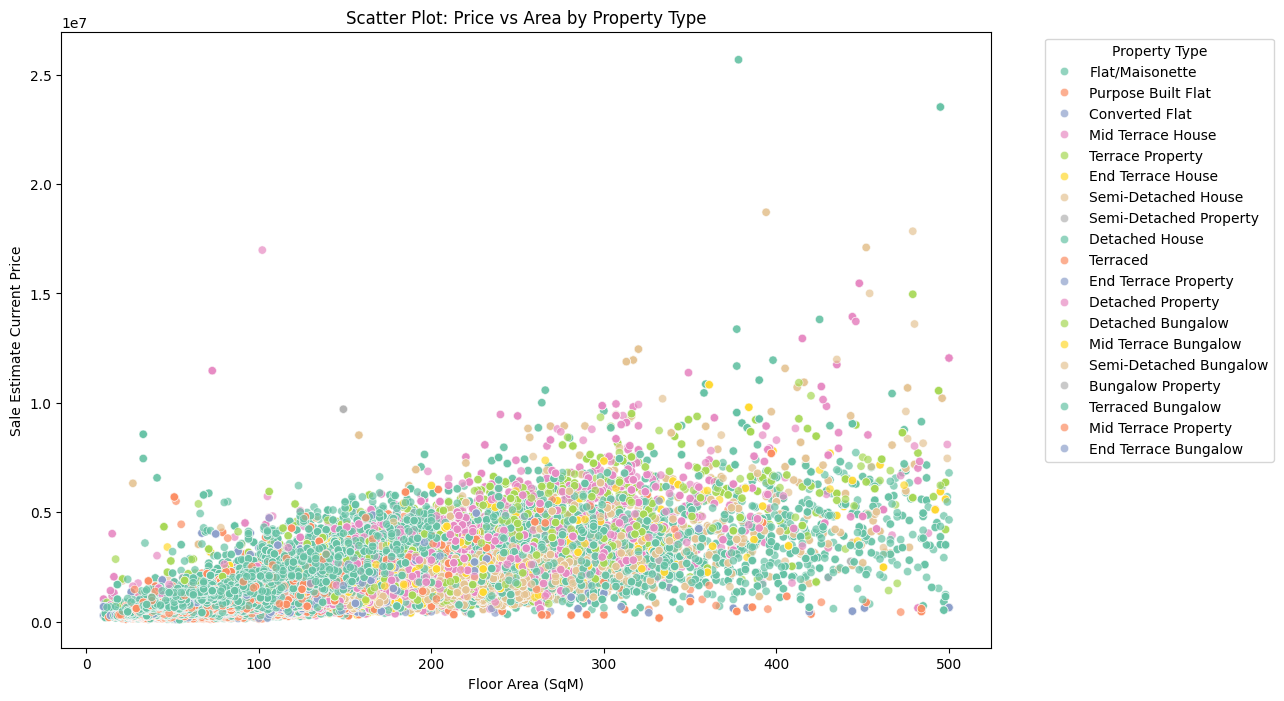

In [14]:
plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=df,
    x='floorAreaSqM',  # Площадь
    y='saleEstimate_currentPrice',  # Цена
    hue='propertyType',  # Тип (отображается цветом)
    palette='Set2',
    alpha=0.7
)
plt.xlabel('Floor Area (SqM)')
plt.ylabel('Sale Estimate Current Price')
plt.title('Scatter Plot: Price vs Area by Property Type')
plt.legend(title='Property Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

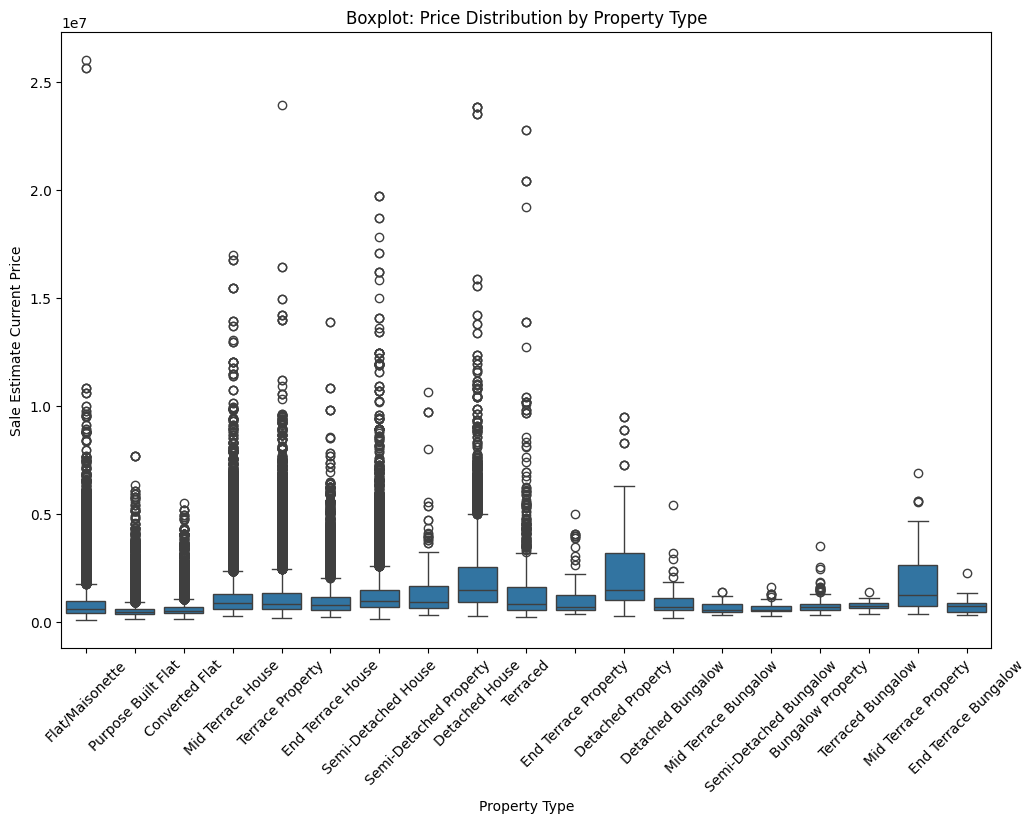

In [15]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='propertyType', y='saleEstimate_currentPrice')
plt.xlabel('Property Type')
plt.ylabel('Sale Estimate Current Price')
plt.title('Boxplot: Price Distribution by Property Type')
plt.xticks(rotation=45)  # Поворачивает подписи категорий для удобства
plt.show()


C:\Users\tania\AppData\Local\Temp\ipykernel_21876\800853887.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_price_per_sqm_sorted, x='propertyType', y='pricePerSqM', palette='Blues_d')


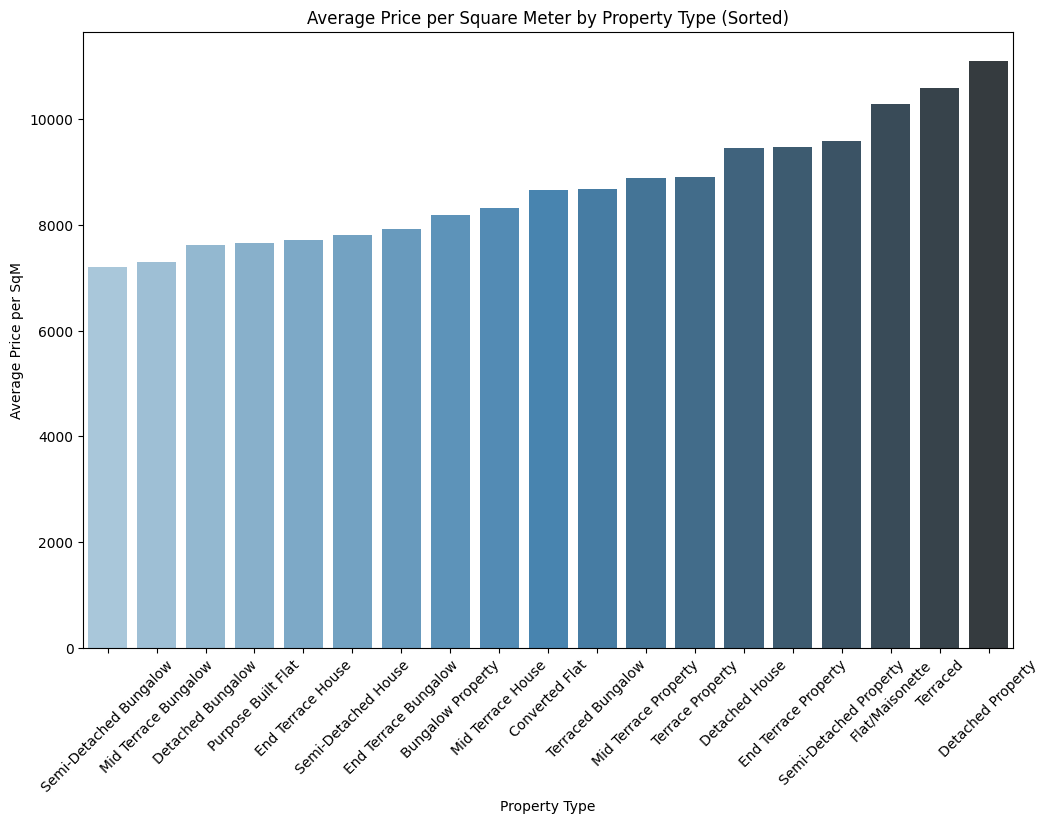

In [16]:
df['pricePerSqM'] = df['saleEstimate_currentPrice'] / df['floorAreaSqM']
# Группировка по propertyType и расчет средней цены за квадратный метр
avg_price_per_sqm = df.groupby('propertyType')['pricePerSqM'].mean().reset_index()
avg_price_per_sqm_sorted = avg_price_per_sqm.sort_values(by='pricePerSqM', ascending=True)

# Построение графика с отсортированными значениями
plt.figure(figsize=(12, 8))
sns.barplot(data=avg_price_per_sqm_sorted, x='propertyType', y='pricePerSqM', palette='Blues_d')
plt.xlabel('Property Type')
plt.ylabel('Average Price per SqM')
plt.title('Average Price per Square Meter by Property Type (Sorted)')
plt.xticks(rotation=45)
plt.show()


In [17]:
# Сгруппировать категории и отсортировать по средней цене за квадратный метр
avg_price_per_sqm_sorted = avg_price_per_sqm.sort_values(by='pricePerSqM', ascending=True)

# Создать словарь для замены категорий на числа
category_to_number = {category: i+1 for i, category in enumerate(avg_price_per_sqm_sorted['propertyType'])}

# Заменить категории на числа в исходном DataFrame
df['propertyType_numeric'] = df['propertyType'].map(category_to_number)

# Вывод результата
print(category_to_number)
print(df[['propertyType', 'propertyType_numeric']].head())


{'Semi-Detached Bungalow': 1, 'Mid Terrace Bungalow': 2, 'Detached Bungalow': 3, 'Purpose Built Flat': 4, 'End Terrace House': 5, 'Semi-Detached House': 6, 'End Terrace Bungalow': 7, 'Bungalow Property': 8, 'Mid Terrace House': 9, 'Converted Flat': 10, 'Terraced Bungalow': 11, 'Mid Terrace Property': 12, 'Terrace Property': 13, 'Detached House': 14, 'End Terrace Property': 15, 'Semi-Detached Property': 16, 'Flat/Maisonette': 17, 'Terraced': 18, 'Detached Property': 19}
         propertyType  propertyType_numeric
0     Flat/Maisonette                  17.0
1  Purpose Built Flat                   4.0
2  Purpose Built Flat                   4.0
3  Purpose Built Flat                   4.0
4  Purpose Built Flat                   4.0


In [18]:
df = df.drop(columns=['propertyType'])

In [19]:
df = df[df['saleEstimate_confidenceLevel'] != 'LOW']

In [20]:
df = df.drop(columns=['saleEstimate_confidenceLevel'])

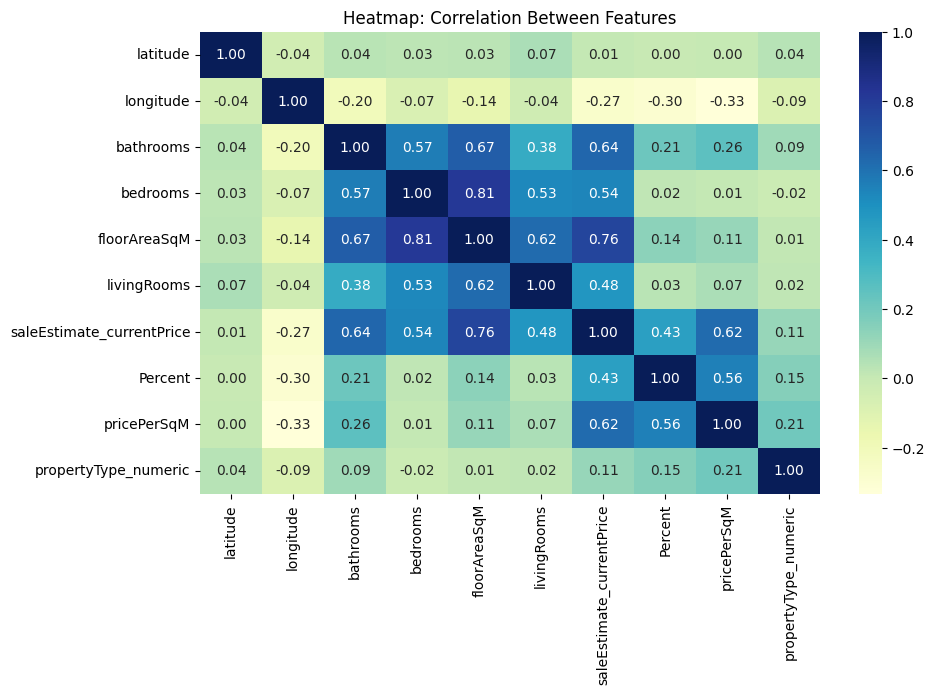

In [21]:
# Add a heatmap
plt.figure(figsize=(10, 6))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Heatmap: Correlation Between Features")
plt.show()


# # Display correlation matrix 
# correlation_matrix = data.corr()
# plt.figure(figsize=(12, 10))
# sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', cbar=True)
# plt.title('Correlation Matrix')
# plt.show()

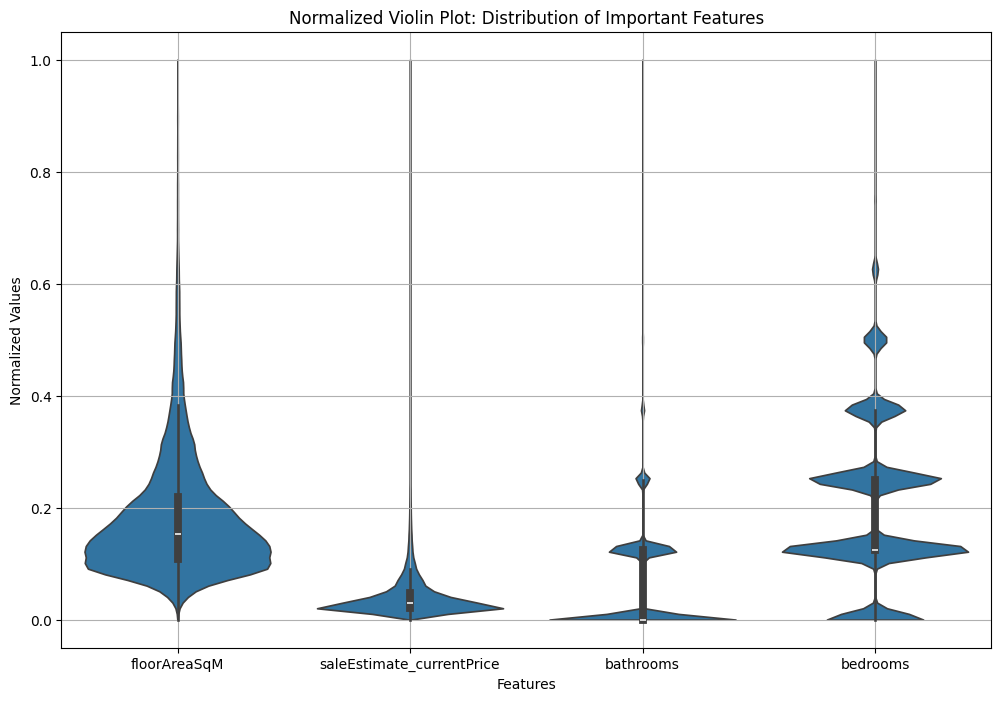

In [22]:
important_columns = ['floorAreaSqM', 'saleEstimate_currentPrice', 'bathrooms', 'bedrooms']
# Normalize the data
normalized_df = df[important_columns].copy()
for column in important_columns:
    normalized_df[column] = (normalized_df[column] - normalized_df[column].min()) / (normalized_df[column].max() - normalized_df[column].min())

plt.figure(figsize=(12, 8))
df_melted = normalized_df.melt(var_name="Feature", value_name="Value")
sns.violinplot(x="Feature", y="Value", data=df_melted, density_norm="width", cut=0)
plt.xlabel("Features")
plt.ylabel("Normalized Values")
plt.title("Normalized Violin Plot: Distribution of Important Features")
plt.grid(True)
plt.show()



In [23]:
# Координаты Букингемского дворца
buckingham_lat = 51.501364
buckingham_lon = -0.14189

# Расчет расстояния по теореме Пифагора
df['distance_from_buckingham'] = ((df['latitude'] - buckingham_lat)**2 + 
                                  (df['longitude'] - buckingham_lon)**2)**0.5



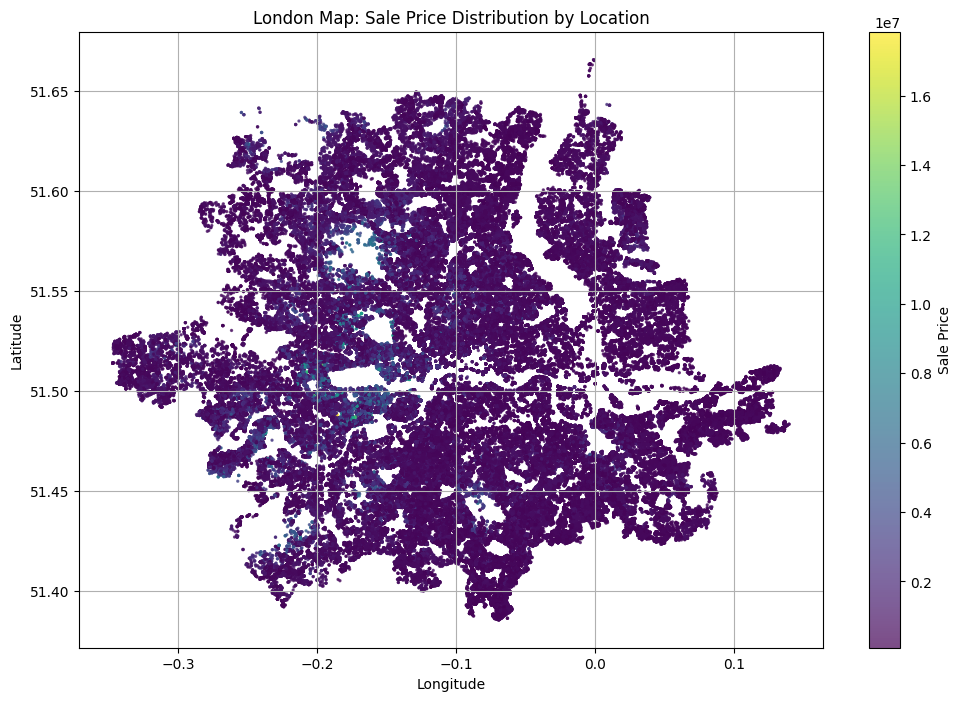

In [24]:
# Add a scatter plot on the map of London
plt.figure(figsize=(12, 8))
plt.scatter(df['longitude'], df['latitude'], c=df['saleEstimate_currentPrice'], cmap='viridis', s=2, alpha=0.7)
plt.colorbar(label='Sale Price')
plt.title("London Map: Sale Price Distribution by Location")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(True)
plt.show()

In [25]:
#def transform_ER()

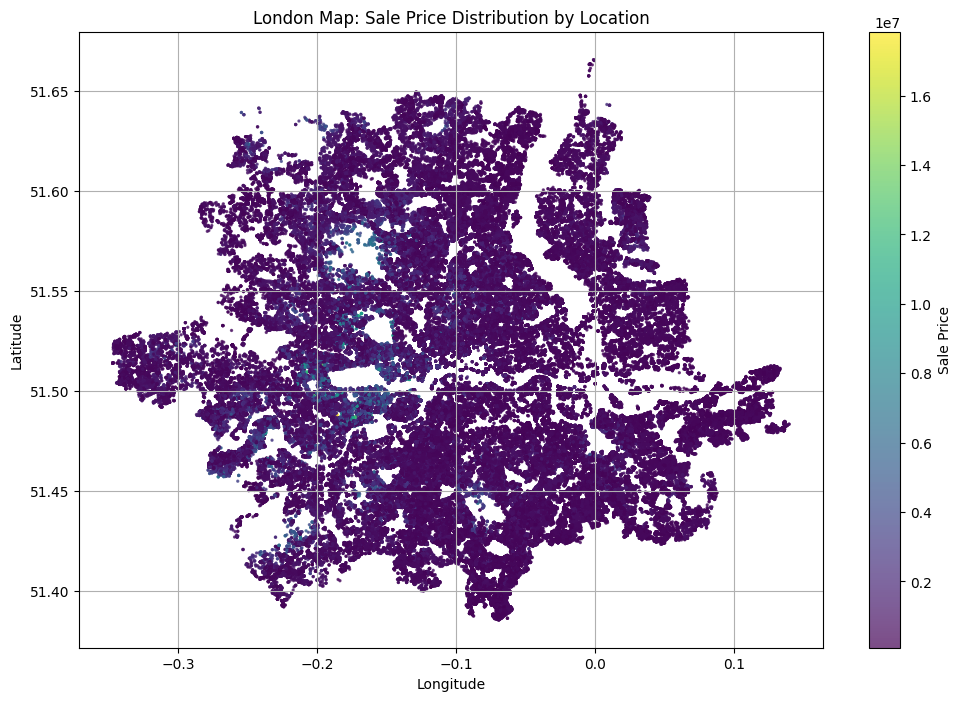

In [26]:
# Add a scatter plot on the map of London
plt.figure(figsize=(12, 8))
plt.scatter(df['longitude'], df['latitude'], c=df['saleEstimate_currentPrice'], cmap='viridis', s=2, alpha=0.7)
plt.colorbar(label='Sale Price')
plt.title("London Map: Sale Price Distribution by Location")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(True)
plt.show()

In [27]:
lower_bound = df['saleEstimate_currentPrice'].quantile(0.05)  # 5th percentile
upper_bound = df['saleEstimate_currentPrice'].quantile(0.95)  # 95th percentile
df = df[(df['saleEstimate_currentPrice'] >= lower_bound) & (df['saleEstimate_currentPrice'] <= upper_bound)]

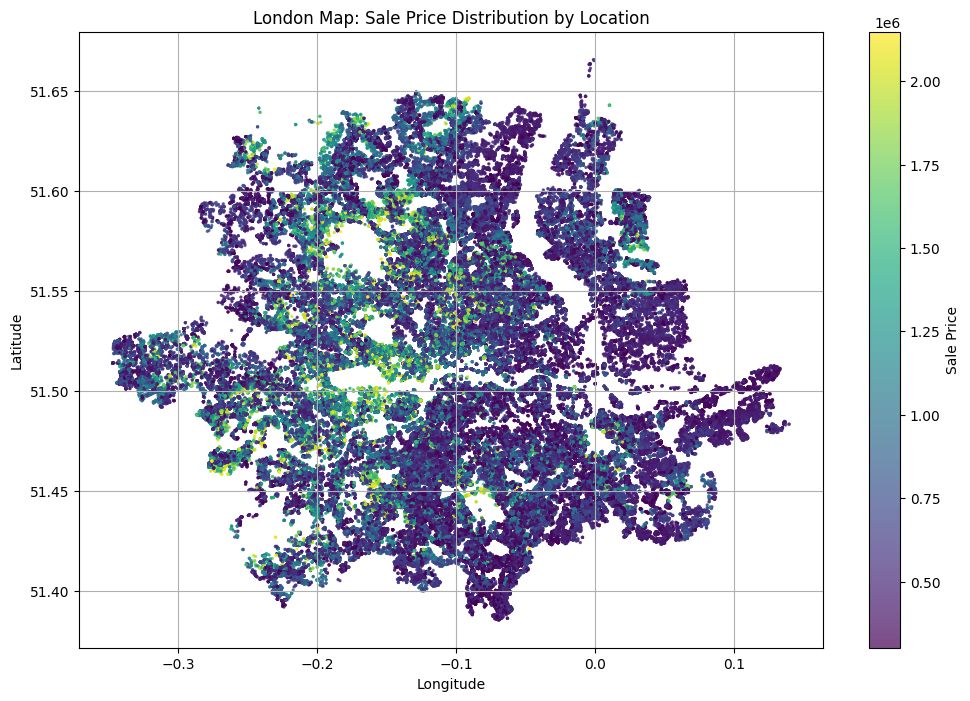

In [28]:
# Add a scatter plot on the map of London
plt.figure(figsize=(12, 8))
plt.scatter(df['longitude'], df['latitude'], c=df['saleEstimate_currentPrice'], cmap='viridis', s=2, alpha=0.7)
plt.colorbar(label='Sale Price')
plt.title("London Map: Sale Price Distribution by Location")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(True)
plt.show()

In [29]:
# Удаление столбцов latitude и longitude
df = df.drop(['latitude', 'longitude'], axis=1)

In [30]:
# Подсчет пропущенных значений в каждом столбце
missing_values = df.isnull().sum()

# Вывод столбцов с пропущенными значениями
print(missing_values[missing_values > 0])


bathrooms               37267
bedrooms                16888
floorAreaSqM             9599
livingRooms             27154
Percent                   599
pricePerSqM              9599
propertyType_numeric      385
dtype: int64


In [31]:
df = df.dropna()
#df = df.drop_duplicates()

In [36]:
df.shape

(188767, 9)

RMSE: 116321.30621192904
R2 Score: 0.9106046047248518


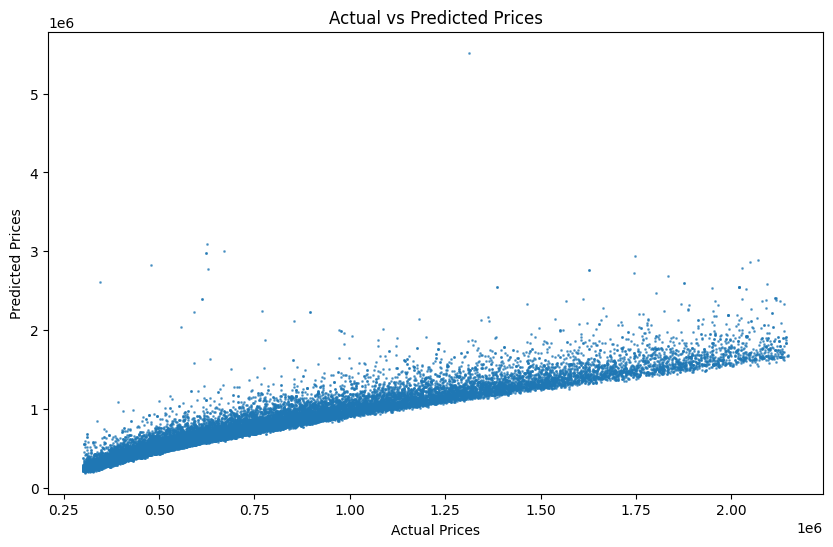

In [32]:
# Define features and target variable
X = df.drop(['saleEstimate_currentPrice'], axis=1)
y = df['saleEstimate_currentPrice']


# Разделение данных на тренировочную и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Масштабирование признаков (только по тренировочным данным)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)  # Скейлер обучается только на тренировочных данных
X_test = scaler.transform(X_test)       # Скейлер применяет ту же трансформацию к тестовым данным

# Обучение модели линейной регрессии
model = LinearRegression()
model.fit(X_train, y_train)

# Предсказания на тестовом наборе
y_pred = model.predict(X_test)

# Оценка модели
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f'RMSE: {rmse}')
print(f'R2 Score: {r2}')

# Визуализация фактических значений против предсказанных
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6, s=1)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.show()

In [40]:
# Используем только площадь как признак
X = df[['floorAreaSqM']]  # Признаки: только площадь
y = df['saleEstimate_currentPrice']  # Целевая переменная: цена

# Разделение данных на тренировочную и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Создание и обучение модели линейной регрессии
model2 = LinearRegression()
model2.fit(X_train, y_train)

# Предсказания на тестовом наборе
y_pred = model2.predict(X_test)

# Оценка модели
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f'RMSE: {rmse}')
print(f'R2 Score: {r2}')

RMSE: 266424.47186703584
R2 Score: 0.5310302445283751


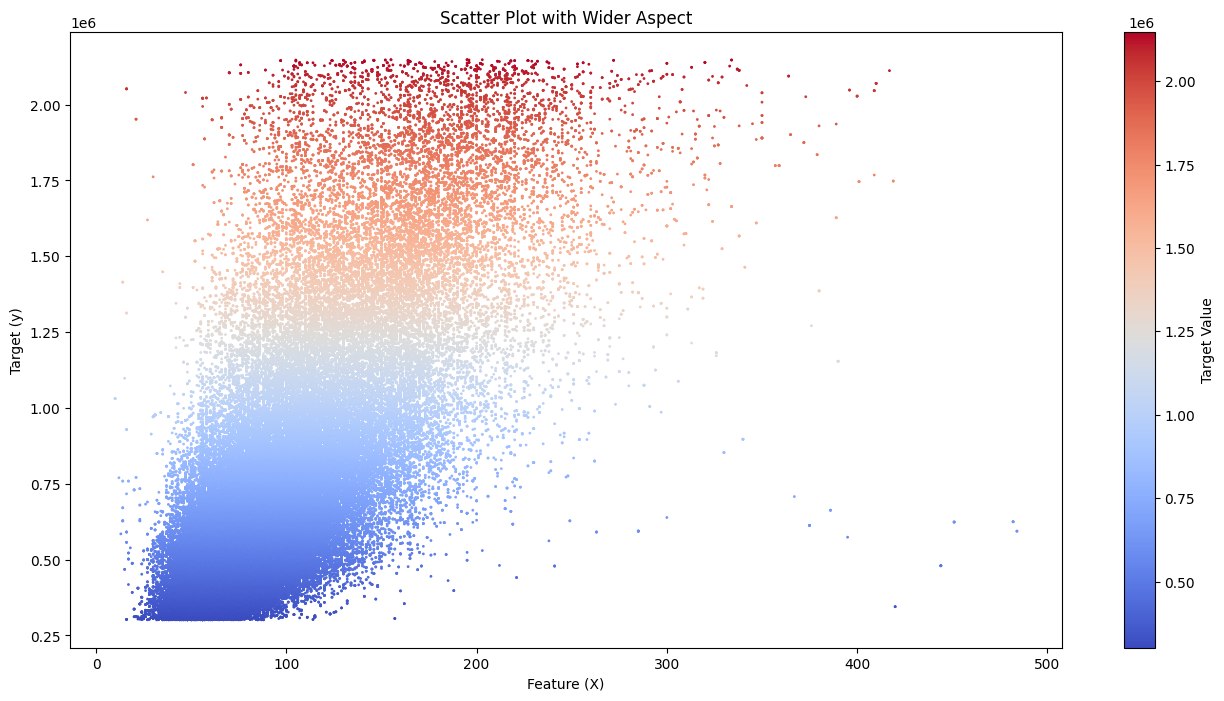

In [41]:
# Create a wider scatter plot
plt.figure(figsize=(16, 8))  # Устанавливаем ширину 16 и высоту 8
plt.scatter(X, y, c=y, cmap='coolwarm', s=1)
plt.xlabel('Feature (X)')
plt.ylabel('Target (y)')
plt.title('Scatter Plot with Wider Aspect')
plt.colorbar(label='Target Value')
plt.show()


In [42]:

# Coefficients
a = model2.coef_[0]  # Для линейной регрессии с одной переменной X
b = model2.intercept_

# linear regression
print(f"Уравнение: y = {a}x + {b}")

Уравнение: y = 6804.774611361827x + 89987.22931182501


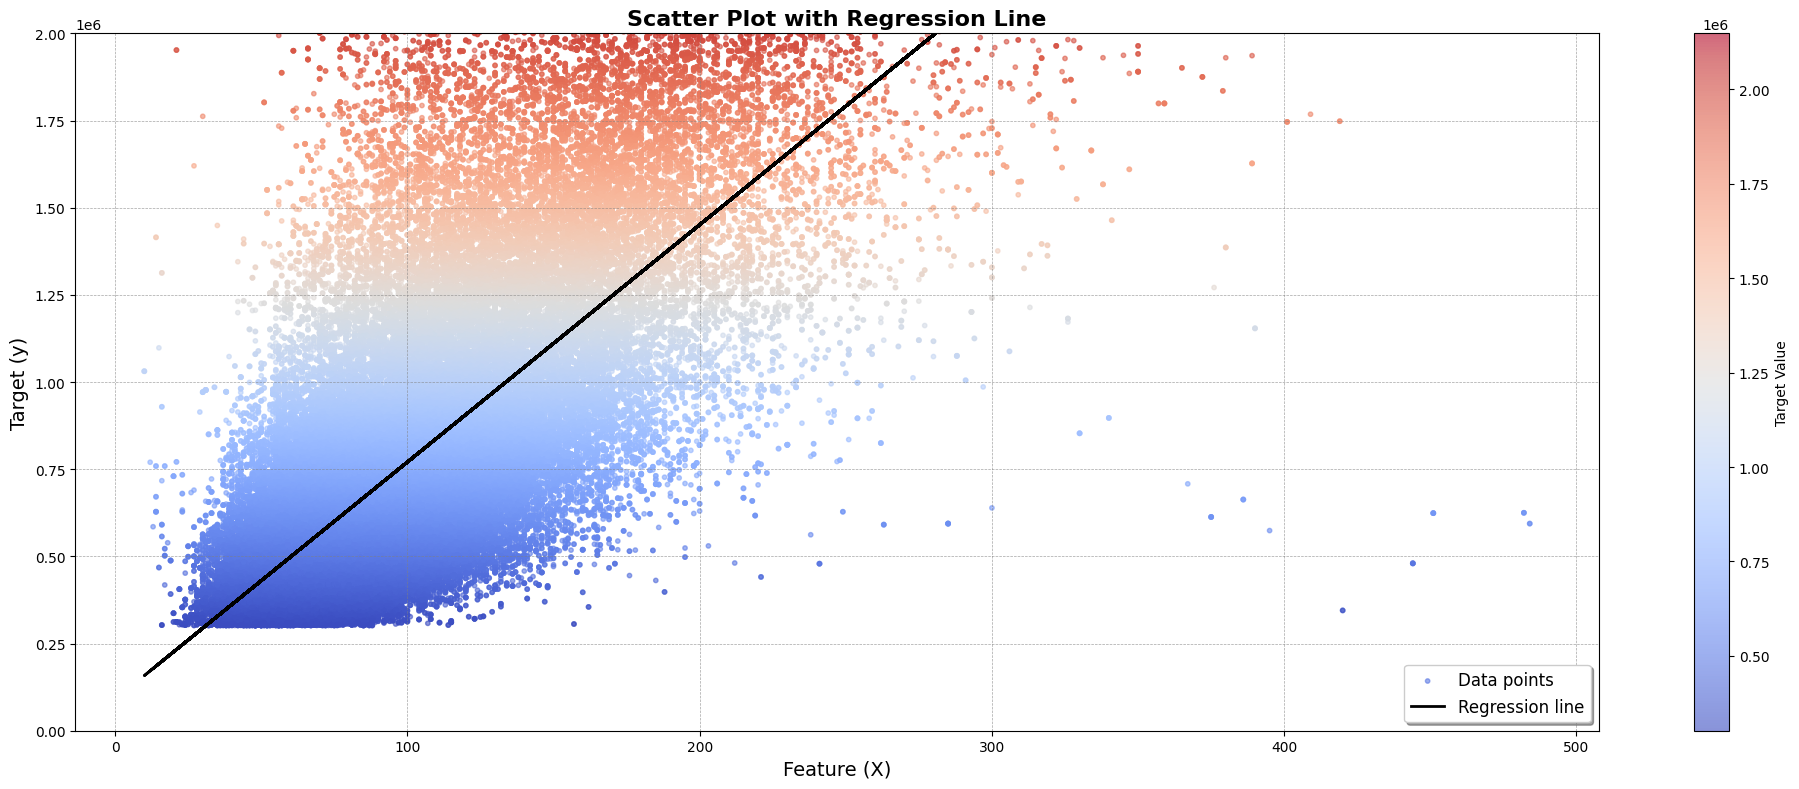

In [47]:
# Create a wider scatter plot with a regression line and limited y-axis
plt.figure(figsize=(20, 8))  # Set figure size

# Scatter plot with color map
plt.scatter(X, y, c=y, cmap='coolwarm', alpha=0.6, s=10, label='Data points')

# Add regression line
plt.plot(X, model2.predict(X), color='black', linewidth=2, label='Regression line')

# Titles and labels
plt.title('Scatter Plot with Regression Line', fontsize=16, fontweight='bold')
plt.xlabel('Feature (X)', fontsize=14)
plt.ylabel('Target (y)', fontsize=14)

# Limit y-axis to 2 million
plt.ylim(0, 2_000_000)  # Set lower limit to 0 and upper limit to 2 million

# Add grid and color bar
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)
plt.colorbar(label='Target Value')
plt.legend(loc='lower right', fontsize=12, frameon=True, shadow=True)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


In [45]:
# Make a prediction for a specific floor area
X_new = [[75]]  # Floor area in square meters (example: 75 m²)
print(model2.predict(X_new))  # Output: predicted price for 75 m²

[600345.32516396]


c:\Users\tania\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Data and Movement Coordination Specialist

Flow and Data Operations Specialist

Data-Driven Flow Coordinator

Logistics and Data Flow Specialist

Stream Coordination and Data Analyst

Data and Flow Strategy Specialist

Movement and Data Integration Coordinator

Data and Operational Flow Specialist

Dynamic Flow and Data Specialist

Data-Enabled Flow Coordinator
